1. Problem Definition


Predict if an individual will churn or not. To do this, we will split the dataset in 80% training and 20% testing set. We will also determine which are the driving features that lead to a customer churn

2. Data Collection

This dataset is picked from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
# Use case pipeline build up starts with importing  all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

3. Exploratory Data Analysis

The goal of EDA is to understand the data structure, conduct initial preprocessing, clean the data, identify patterns and inconsistencies in the data (i.e., skewness, outliers, missing values) and build and validate hypotheses.

#1 Understanding

In the first part of EDA the data frame is evaluated for structure, columns included and data types. The goals of this step is to get a general understanding for the data set, check domain knowledge and get first ideas on topics to investigate. We will use some pandas functions for this:

In [3]:
# get summary of dataframe including data types, shape and memory storage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# get statistical information on numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The unique values for each feature are printed to the console to get a deeper understanding about the feature values

In [5]:
# looping through the columns to get unique values per column

for col in df.columns:
    print(f"Unique {col}'s count: {df[col].nunique()}")
    print(f"{df[col].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

By inspecting the columns and their unique values, a general understanding about the features can be build. The features can also be clustered into different categories.

Classification Label

Churn - Whether the customer churned or not (Yes or No)

Customer Services Booked

PhoneService - Whether the customer had a phone service (Yes, No)

MultipleLines - Whether the customer has multiple lines (Yes, No, No phone service)

InternetService - Customer's internet service provider (DSL, Fibre Optic, No)

OnlineSecurity - Whether the customer has online security (Yes, No, No internet service)

OnlineBackup - Whether the customer online backup (Yes, No, No online backup)

DeviceProtection - Whether the customer has device protection (yes, No, No device protection)

TechSupport - Whether the customer has tech support (Yes, No, No tech support)

StreamingTV - Whether the customer has streaming TV (Yes, No, No streaming tv)

StreamingMovies - Whether the customer has streaming movies (Yes, No, No streaming movies)


Customer Account Information

Tenure - Number of months the customer has stayed with the company

Contract - The contract term of the customer (Month-to-month, OneYear, Twoyear)

PaperlessBilling - Whether the customer has paperless billing (Yes, No)

PaymentMethod - The customer's payment method (Electronic check, mail check, Bank transfer, credit card)

Monthly Charges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer


Customer Demographic Info

customerId - Unique customer id

Gender - whether the customer is male or female

SeniorCitizen - Whether the customer is senior citizen or not (1,0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not ( Yes, No)


#  Data Preprocessing for EDA

In [6]:
#changing the data type of totalcharge and tenure to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for feature in feature_list:
        df[feature] = df[feature].astype(float)
    return df
    

In [7]:
feature_to_float(['tenure'],df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
# Renaming the data values of payment method for better readability
print(df['PaymentMethod'].unique())
payment_column = {"Electronic check":"E-check","Mailed check":"Mailed check","Bank transfer (automatic)":"Bank transfer"
                 , "Credit card (automatic)":"Credit card"}
df['PaymentMethod'].replace(payment_column, inplace=True)

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [9]:
# checking the datatypes for intended data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
# counting no. of missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are only 11 missing vales for TotalCharges column. For the sake of simplicity we will delete those records

# Hypothesis building

Looking at the features inluded in the data, following hypothesis can be made:

    1. The longer the contract the less likely it is that the customer will churn as he/she is less frquently confronted with the termination/prolongation decision and potentially values contracts with reduced effort
    
    2. Customers are willing to cancel simple contracts compared to complex product bundles. 
    
    3. Customers with spouses and children might churn less to keep the service running for their family
    
    4. Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers for churn.
    
    5. More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.
    
    6. Senior citizens tend to churn less due to extended effort associated with terminatting contracts.
    

# Data Exploration

In [11]:
#apply the fivethirtyeight style to all plots
plt.style.use('fivethirtyeight')

In [12]:
# frequency distribution for churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

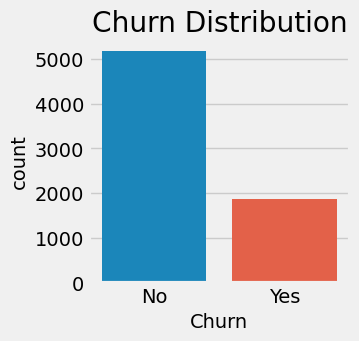

In [13]:
# display frequency distribution
plt.figure(figsize=(3,3))
ax = sns.countplot(x=df['Churn'], linewidth =1)
plt.title("Churn Distribution" )
plt.show()

The above plot shows a class imbalance problem between churners and no-churners. We can use resampling technique or use a metric other than acuracy to evaluate the model predictions

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

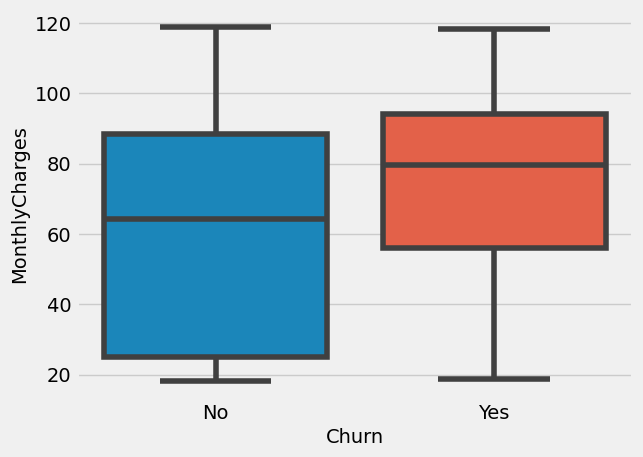

In [14]:
# create a function to generate boxplots
sns.boxplot(x='Churn', y ='MonthlyCharges', data =df)

In [53]:
# plt.figure(figsize=(4,4))
# gen_boxplot(['MonthlyCharges', 'tenure','TotalCharges'],df)

boxplot_cols = ['MonthlyCharges', 'tenure','TotalCharges']
plt.figure(figsize=(20,7))
def gen_boxplot(feature_list, df):
    for i, feature in enumerate(feature_list):
        ax = plt.subplot(1, len(feature_list), i+1)
        sns.boxplot(x='Churn', y =feature, data = df, width = 0.5)
        ax.set_title(feature)


<Figure size 2000x700 with 0 Axes>

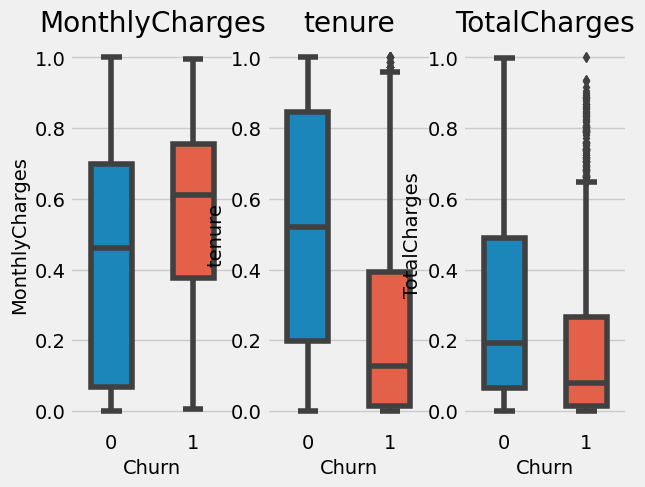

In [54]:

gen_boxplot(boxplot_cols,df)

Churning customers have hig monthly charges with a median of 80 usd and much lower IQR range as compared to that of non churning customers

Churning customers have a very low median tenure of 10 as compared to non churning customers of 38

Total chargers are a result of tenure and monthly charges which are more insightful at customer level


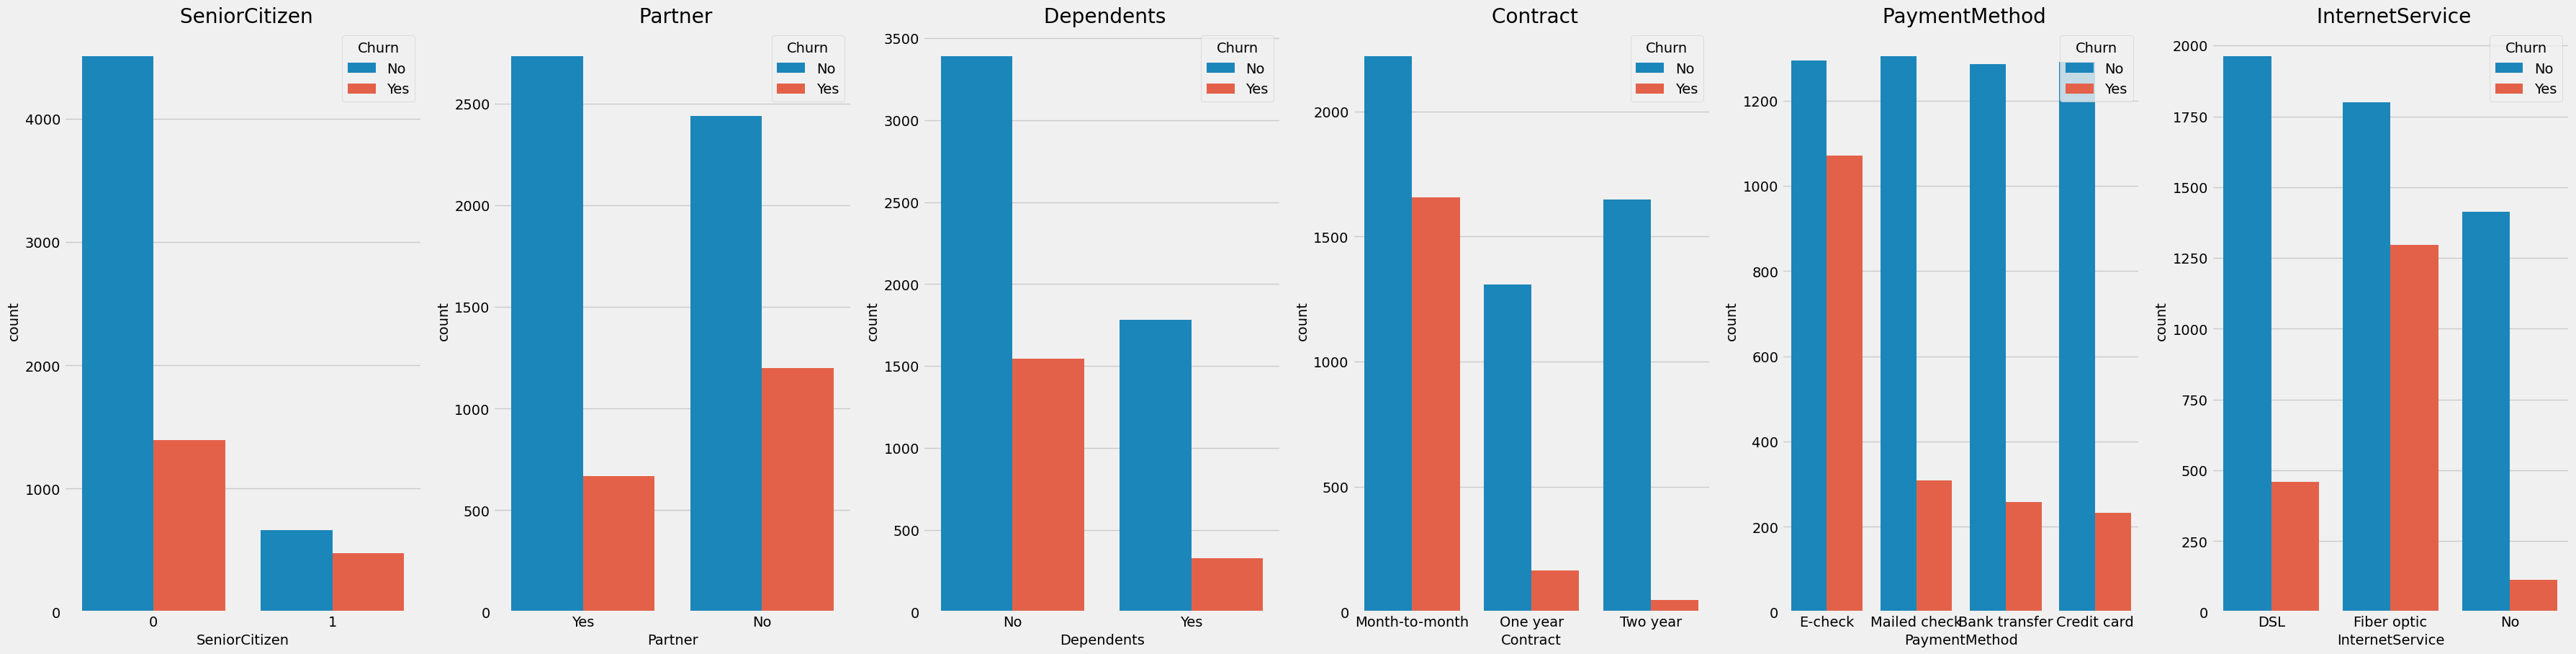

In [17]:
# data with categorical values
# #checking the distribution of demographic data
cols = ['SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', "InternetService"]

plt.figure(figsize=(40,10))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(hue = df['Churn'], x=str(col), data= df)
    ax.set_title(f" {col}")

1. Senior citizens churn rate is lower than non-senior citizens or young people

2. People with no partners have higher churn rate. Moderatley high churn rate for people with no patners

3. People with no childrens/dependents have higher churn rate

4. People on monthly contract tend to churn more than on yearly or two yearly contract

5. People on electronic check payment method churn more frequently than mailed check, than bank transfer and few people on credit card churn

6. People with fibre optic internet service churn more frequntly as compared to DSL or No internet service at all.


In [18]:
# Checking for outliers by applying IQR 
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()



tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers detected with the IQR method -- so no changes made

## Data Cleaning

In [19]:
# drop rows with missing values
df = df.dropna()

## Feature Engineering

Based on data types and values, following actions are defined to preprocess and engineer the features for machine readability and further analysis:

CustomerId : not relevant and hence removed

SeniorCitizen: No action required

LabelEncoding: Categorical features which take 2 values are trasformed into binary integers

gender

Partner

Dependents

Churn

PhoneService

PaperlessBilling


One-hot encoding: fetaures which are categorical, not ordinal (no ranking) but take more than 2 values. For each value, a new variable is created with a binary integer indicating if the value occured in the data entry or not (1 or 0)

MultipleLines

InternetService

OnlineSecurity

OnlineBackup

DeviceProtection

TechSupport

StreamingTV

StreamingMovies

Contract

PaymentMethod




## MinMax Scaling

Values of numerical features are rescaled between a range of 0 and 1. For normally distributed features standard scaler could be used, which scales values around a mean of 0 and a standard deviation of 1. here, we will use min-max scaler for all numerical features.

. tenure

. TotalCharges

. MonthlyCharges




# Feature Engineering

In feature engineering, the steps identifed at the end of the EDA are executed. Additionally, a new feature is generated from existing features and a correlation analysis is conducted after all features have been transformed to numerical.

### Feature Selection / Generation

In [20]:
# drop customer id feature
df = df.drop(columns='customerID')

In [21]:
# Generate new feature "NumberOfAdditionalServices" by summing up number of addon services consumed.
df['NumberOfAdditionalServices'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
                                       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

<Axes: xlabel='NumberOfAdditionalServices', ylabel='count'>

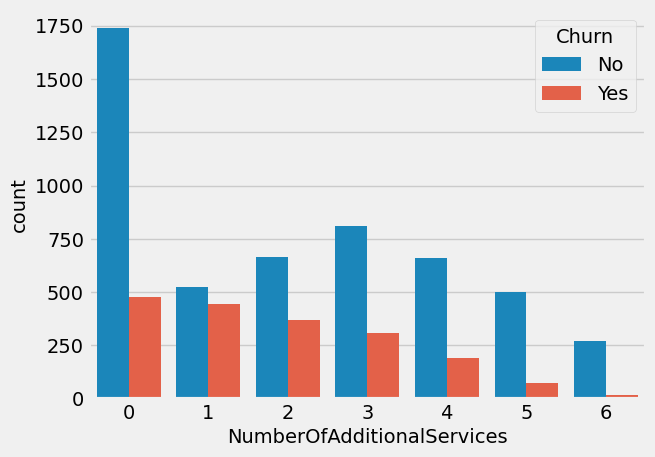

In [22]:
#Generate countplot for new feature
sns.countplot(hue = df['Churn'], x='NumberOfAdditionalServices', data= df)

Countplot shows that customers with 0 or 1 additional services have a very high churn rate, as the number of additional services increases the churn rate decreases

## Label Encoding

In [23]:
features_le = ['gender', 'Partner' , 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes':1 , 'No':0})
    return

label_encoding(['Partner' , 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'],df)

In [24]:
df['gender'] = df['gender'].map({'Female': 0, 'Male':1})


## One-hot encoding

In [25]:
feature_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport','StreamingTV', 'StreamingMovies','Contract','PaymentMethod','NumberOfAdditionalServices']

df = pd.get_dummies(df, columns=feature_ohe)

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Credit card,PaymentMethod_E-check,PaymentMethod_Mailed check,NumberOfAdditionalServices_0,NumberOfAdditionalServices_1,NumberOfAdditionalServices_2,NumberOfAdditionalServices_3,NumberOfAdditionalServices_4,NumberOfAdditionalServices_5,NumberOfAdditionalServices_6
0,0,0,1,0,1.0,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,2.0,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,0,0,0,0,1,0
7039,0,0,1,1,72.0,1,1,103.20,7362.90,0,...,1,0,0,0,0,0,0,1,0,0
7040,0,0,1,1,11.0,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,0,0,0
7041,1,1,1,0,4.0,1,1,74.40,306.60,1,...,0,0,1,1,0,0,0,0,0,0


### Feature rescaling: MinMax Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

feature_mms = ['tenure','MonthlyCharges','TotalCharges']

df_feature_mms = pd.DataFrame(df,columns=feature_mms)
df_remaining_features = df.drop(columns=feature_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_feature_mms)

df_rescaled_features = pd.DataFrame(rescaled_features,columns=feature_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features,df_rescaled_features], axis=1)

In [28]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,NumberOfAdditionalServices_0,NumberOfAdditionalServices_1,NumberOfAdditionalServices_2,NumberOfAdditionalServices_3,NumberOfAdditionalServices_4,NumberOfAdditionalServices_5,NumberOfAdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,1,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0.323944,0.662189,0.227521
7039,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1.000000,0.845274,0.847461
7040,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.140845,0.112935,0.037809
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0.042254,0.558706,0.033210


### Correlation Analysis

<Axes: >

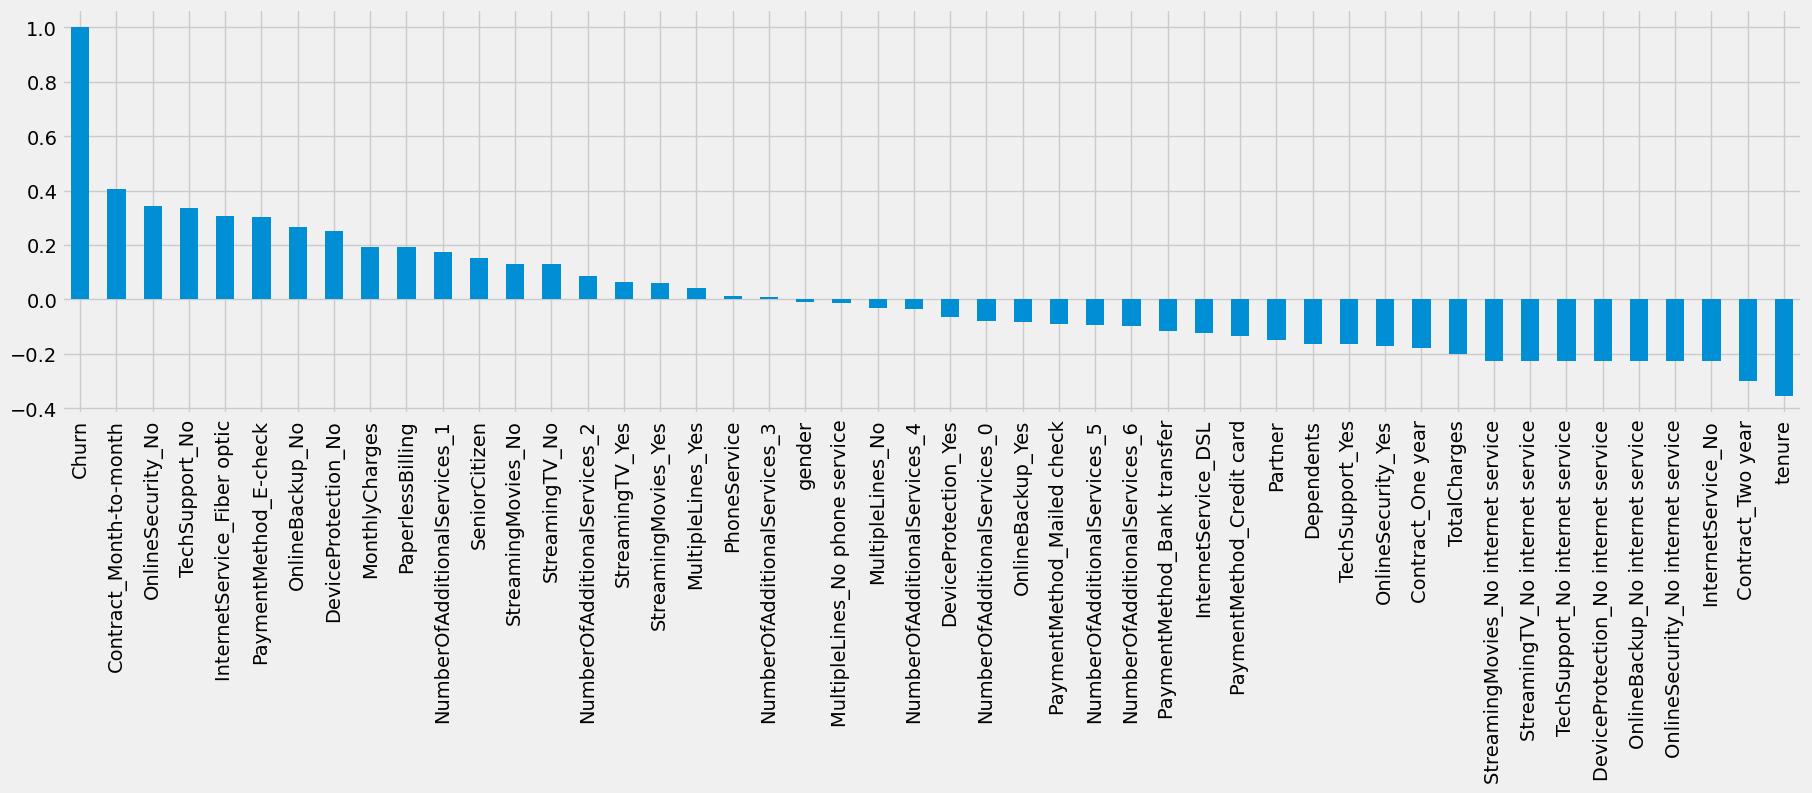

In [29]:
# show correlation of churn with each of the remaining feature

#plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

highly correlated to month to month contract and inversely proportinal to tenure

## Train-Test Split

In [30]:
# applying sklearns splitter function train_test_split
from sklearn.model_selection import train_test_split
X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Evaluation Metrics

Feature Weights: indicates the top features used by the model to generate the predictions

Confusion Matrix: Dhows a grid of true and false predictions compared to actual values.

Accuracy Score: Shows the overall accuracy of the model for training set and testing set

ROC Curve: Shows the diagnostic ability of a model by bringing together True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)


AUC (for ROC): Measures the overall seperability between classes of the model related to the ROC curve

Precision-Recall Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall which are not dependent on the number of true negatives and therby excludes the imbalance.

F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both

AUC (for PRC) Measures the overall seperability between classes of the model related to the Precision-Recall curve




In [31]:
# !pip install cython==0.29.21
# # !pip install --upgrade pip

In [32]:
# import sklearn

# sklearn.__version__

'0.24.2'

In [33]:
# from sklearn.metrics import plot_confusion_matrix

In [34]:
# pip install scikit-learn==0.24.2

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score



In [36]:
# Define a function which plots feature weights for a classifier

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 features')
    top_weights_selected.plot(kind='bar')
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 features')
    bottom_weights_selected.plot(kind='bar')
    
    return print("")
    

In [37]:
# define a fucntion to plot confusion matrix 
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn','Churn'], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn','Churn'], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (normalized)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train,y_train)} (as comparison)')
    return print("")
    

In [38]:
# define a function that plots the ROC curve and AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC curve')
    plt.show()
    
    return print(f'AUC score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')


In [39]:
# define a function taht plots the precision-recall-curve and F1 score and AUC score

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 score: {f1_score_result} \n AUC score (PR): {auc_score_result}\n')

### Step 7: Model Selection, Traing, Prediction and Assessment

In the beginning we will test out several models and measure their performance by several metrics. Those models will be optimized in a later step by tuning their hyperparameters. The models used include:

K Nearest Neighbours  - fast, simple and instance-based

Logistic regression - fast and linear model

Random Forest - slower but accurate ensemble model based on decision trees

Support Vector Machines - slower but accurate model used here in non-linear form

### K Nearest Neighbours
    

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate and train the KNN classifier based on the training set.

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


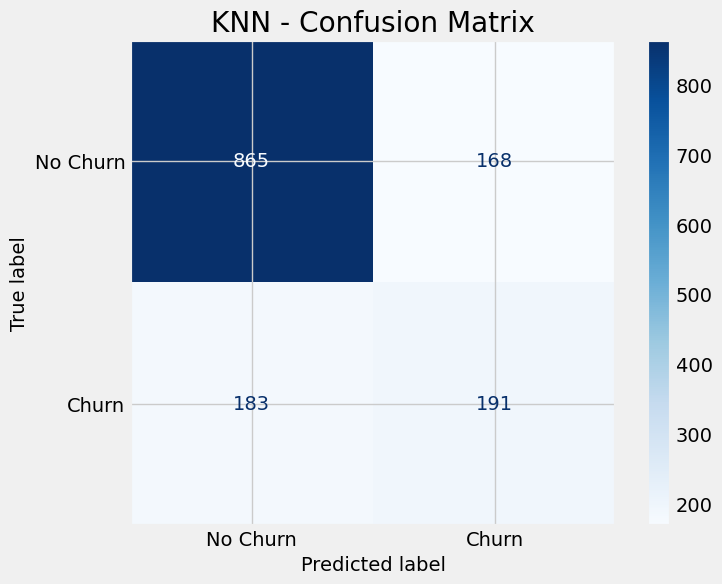

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


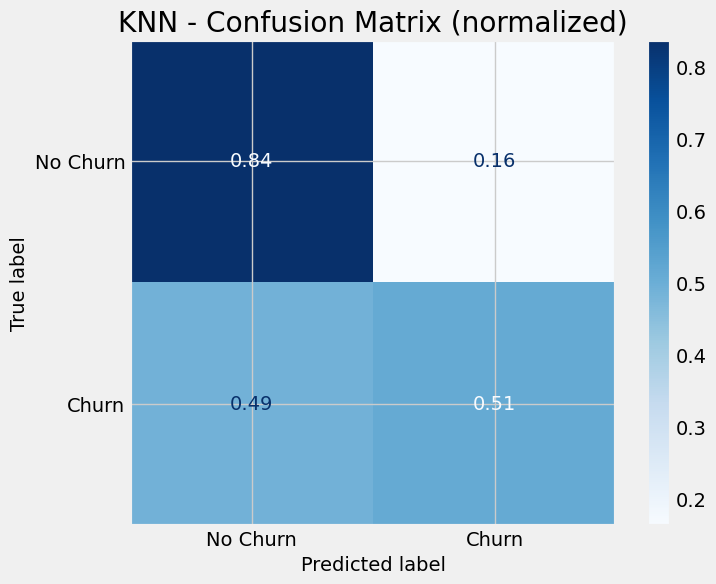

Accuracy Score Test: 0.7505330490405118


/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score Train: 0.8408888888888889 (as comparison)



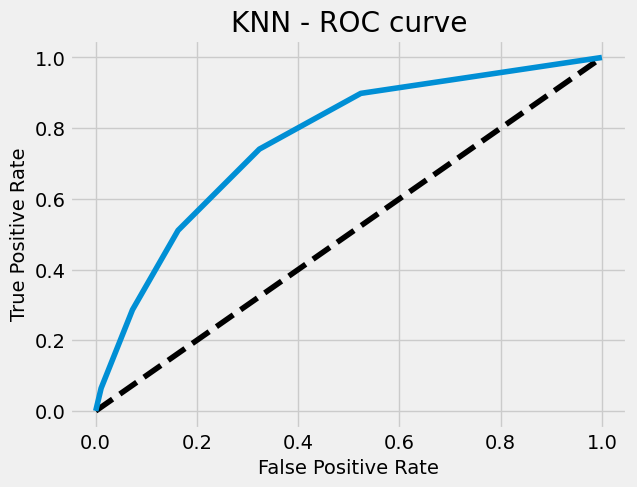

AUC score (ROC): 0.7639099554280921



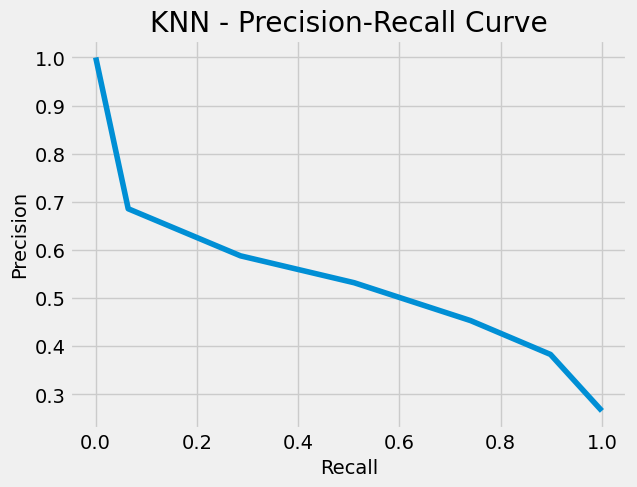

F1 score: 0.5211459754433834 
 AUC score (PR): 0.5334209987606564



In [41]:
# plot model evaluations:
confusion_matrix_plot(X_train, y_train, X_test, y_test,knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test,y_test,y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn, y_pred_knn_prob, 'KNN')

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

# Instanticiate and train the logistic regression model on the training set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [57]:
#Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)


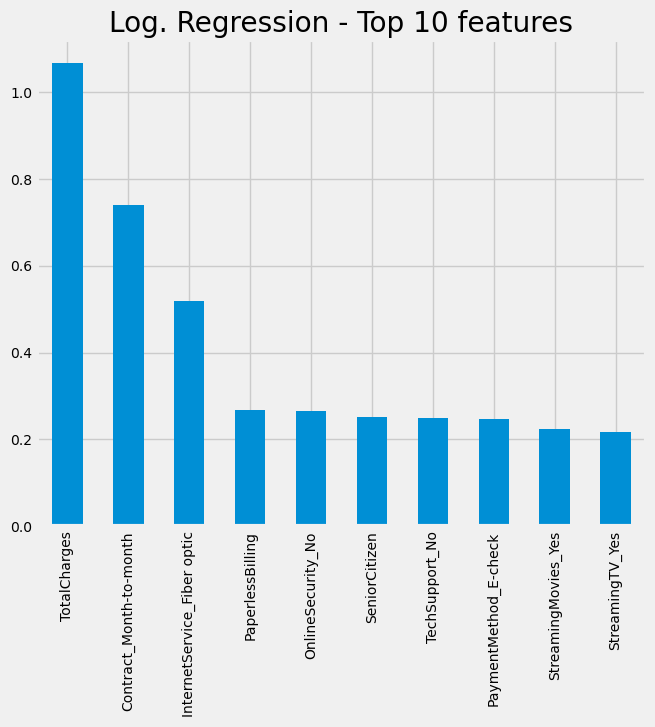

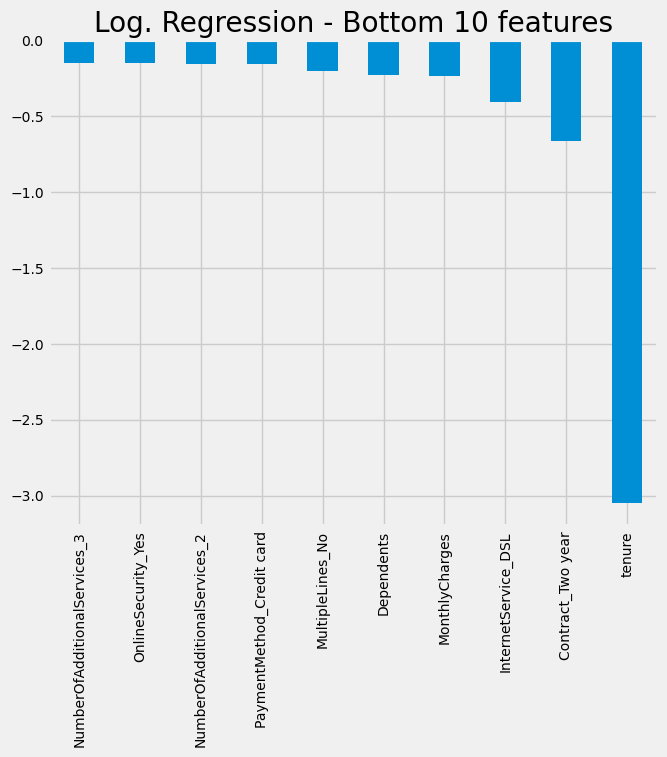

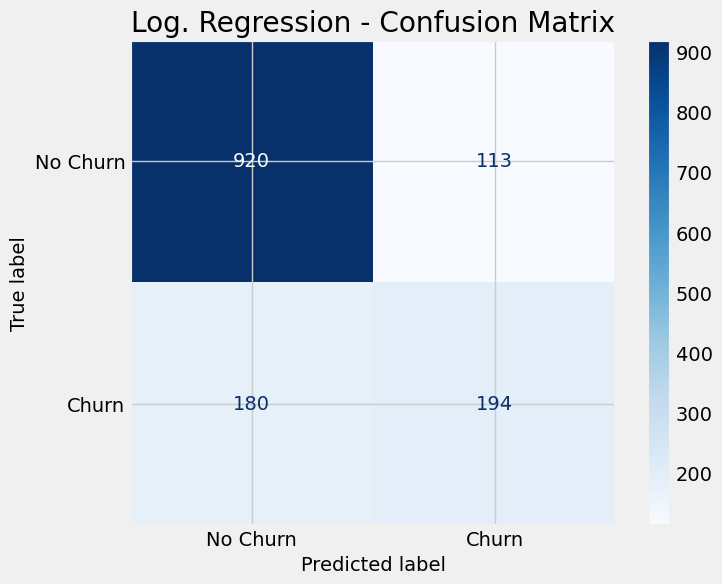

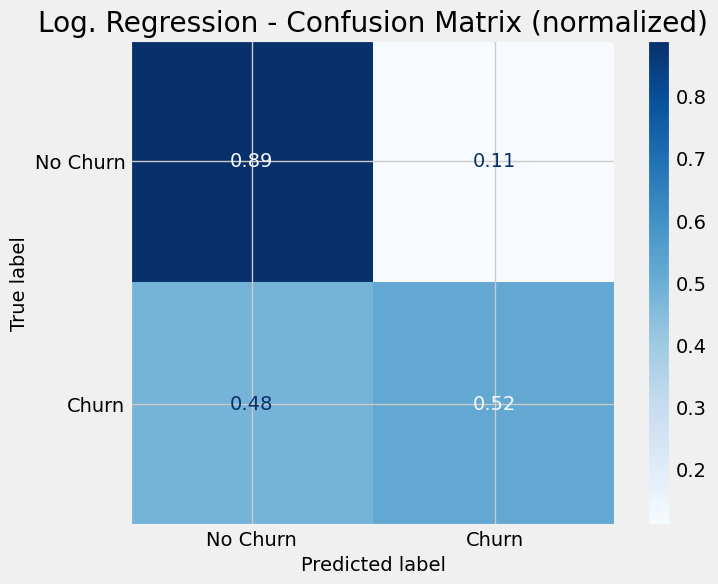

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8074666666666667 (as comparison)



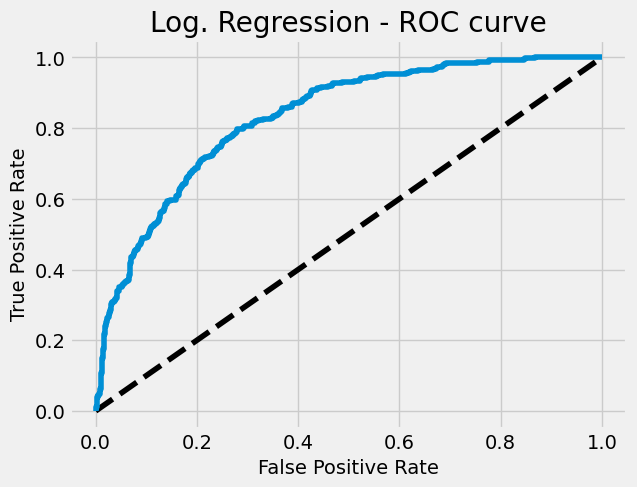

AUC score (ROC): 0.8318225820645957



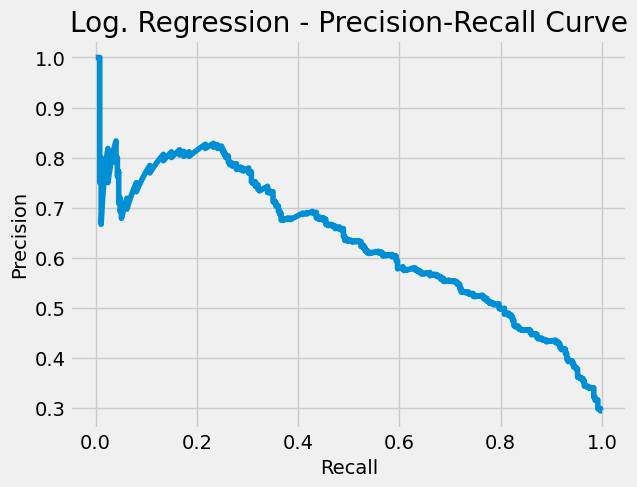

F1 score: 0.5697503671071952 
 AUC score (PR): 0.6301668845197653



In [58]:
#plot model evaluations

feature_weights(X1,logreg,"Log. Regression")
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, "Log. Regression")
roc_curve_auc_score(X_test,y_test,y_pred_logreg_prob,'Log. Regression')
precision_recall_curve_and_scores(X_test,y_test,y_pred_logreg,y_pred_logreg_prob,'Log. Regression')

## Random Forest

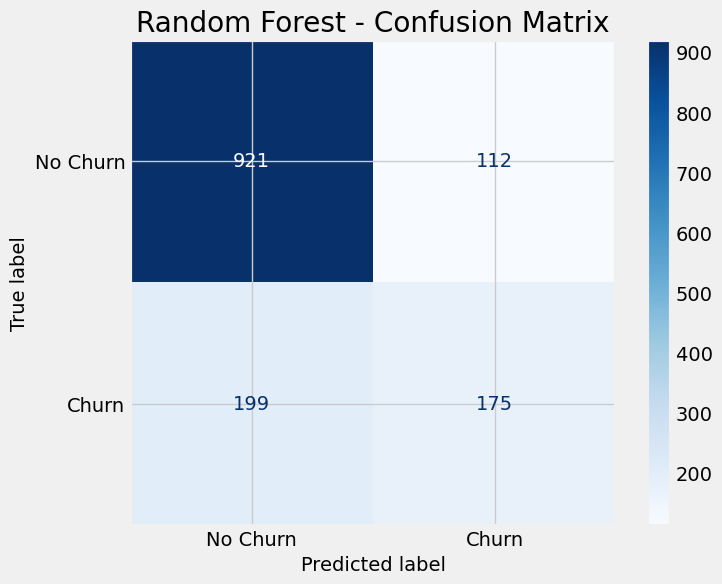

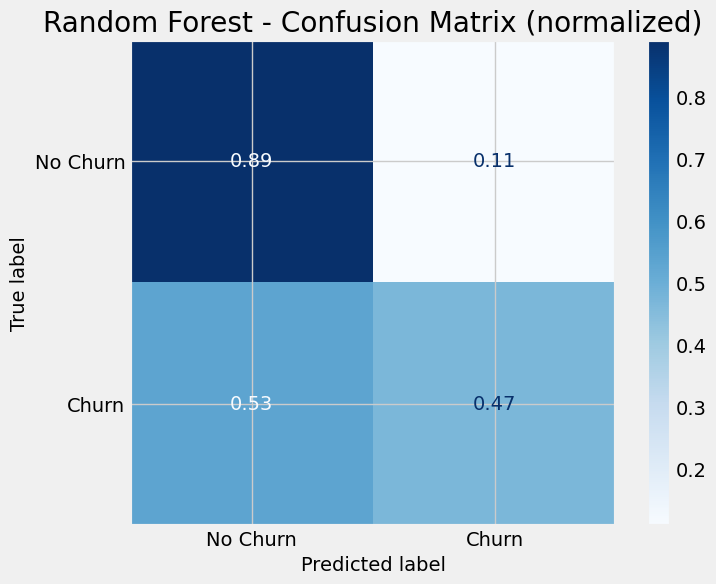

Accuracy Score Test: 0.7789623312011372
Accuracy Score Train: 0.9976888888888888 (as comparison)



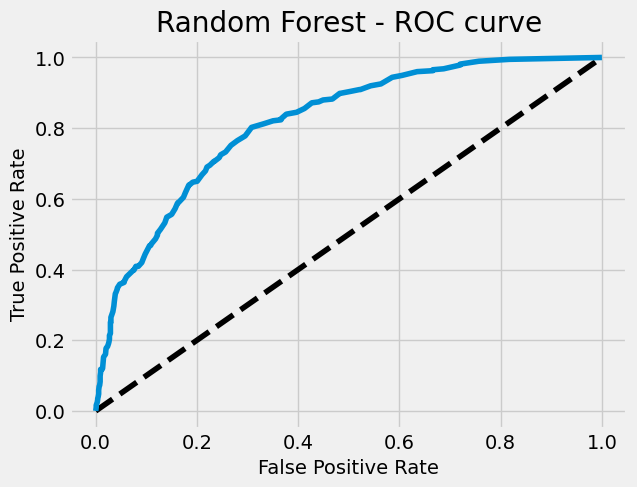

AUC score (ROC): 0.815003287242909



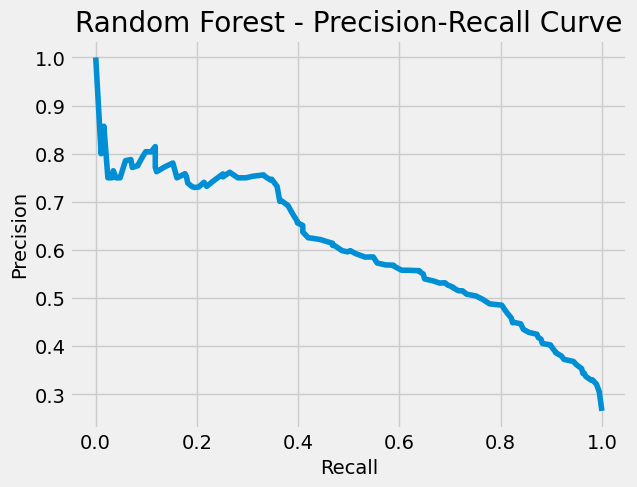

F1 score: 0.529500756429652 
 AUC score (PR): 0.6067316793342369



In [60]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Make predictions 
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)


#plot model evaluations

confusion_matrix_plot(X_train,y_train, X_test, y_test, rf, y_pred_rf, "Random Forest")
roc_curve_auc_score(X_test,y_test,y_pred_rf_prob, "Random Forest")
precision_recall_curve_and_scores(X_test,y_test,y_pred_rf,y_pred_rf_prob, 'Random Forest')

## Support Vector Machines

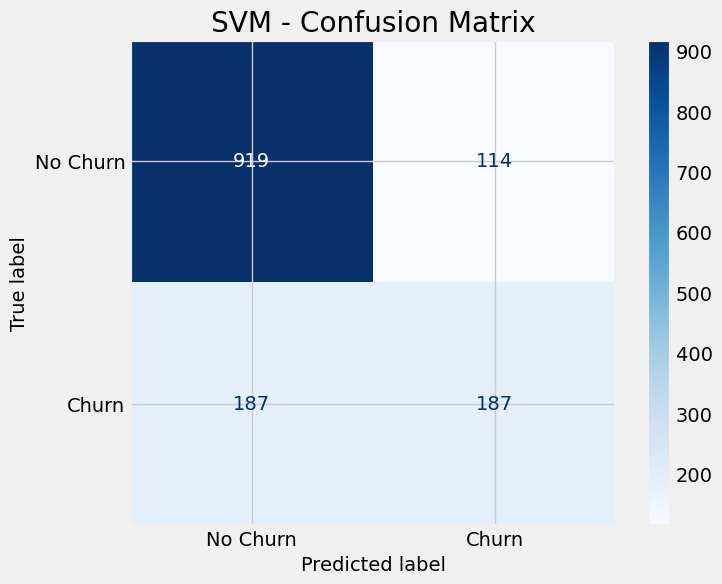

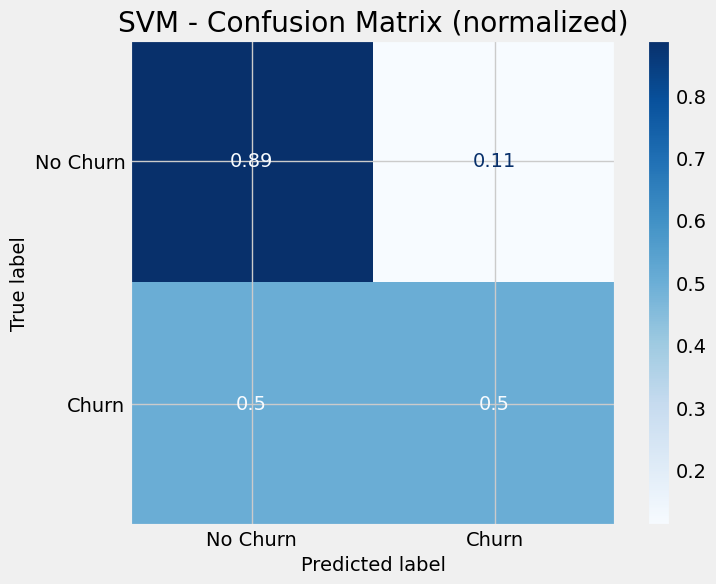

Accuracy Score Test: 0.7860696517412935
Accuracy Score Train: 0.8190222222222222 (as comparison)



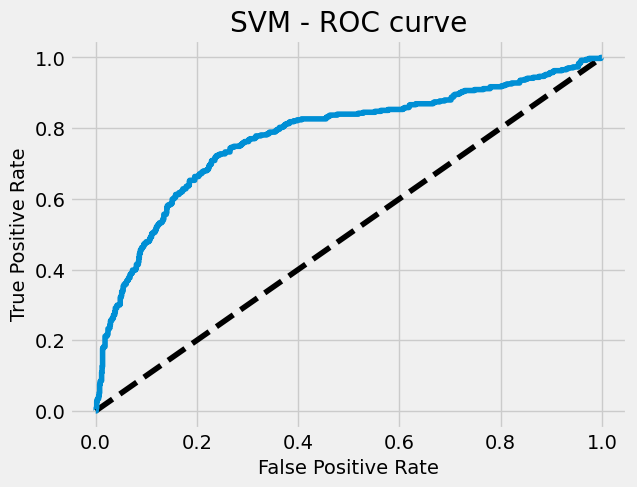

AUC score (ROC): 0.7763367689767098



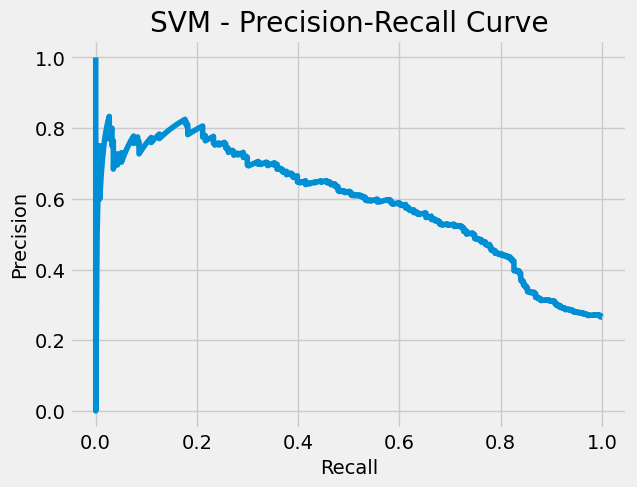

F1 score: 0.554074074074074 
 AUC score (PR): 0.5888998154627743



In [62]:
from sklearn.svm import SVC

# instantiate and train the model
svm1 = SVC(kernel='rbf', probability=True)
svm1.fit(X_train, y_train)

#Make predictions
y_pred_svm = svm1.predict(X_test)
y_pred_svm_prob = svm1.predict_proba(X_test)


# Plot model evaluations
confusion_matrix_plot(X_train,y_train,X_test,y_test,svm1,y_pred_svm, "SVM")
roc_curve_auc_score(X_test,y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test,y_test, y_pred_svm,y_pred_svm_prob, 'SVM')



## Hyperparameter Tuning/ Model Improvement


To address a potential bias stemming from the specific split of the data in the train-test-split part, cross-validation is used during hyper parameter tuning with Grid and Randomized search. Cross validations split the training data into a specified amount of folds. For each iteration, one fold is held out as "training-dev" set and other folds are used as trainig set. Result of cross-validation is k values for all metrics on the k-fold CV.


### KNN optimized

Grid search is used to detremine the optimal number of neighbors leading to best model performance


In [63]:
from sklearn.model_selection import GridSearchCV

#define parameter for Grid search and instantiate and train models
param_grid = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

#Make predictions 
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_prob_tuned = knn_cv.predict_proba(X_test)

print('KNN best number of neigbors', knn_cv.best_params_, '\n')


/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

KNN best number of neigbors {'n_neighbors': 22} 



/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


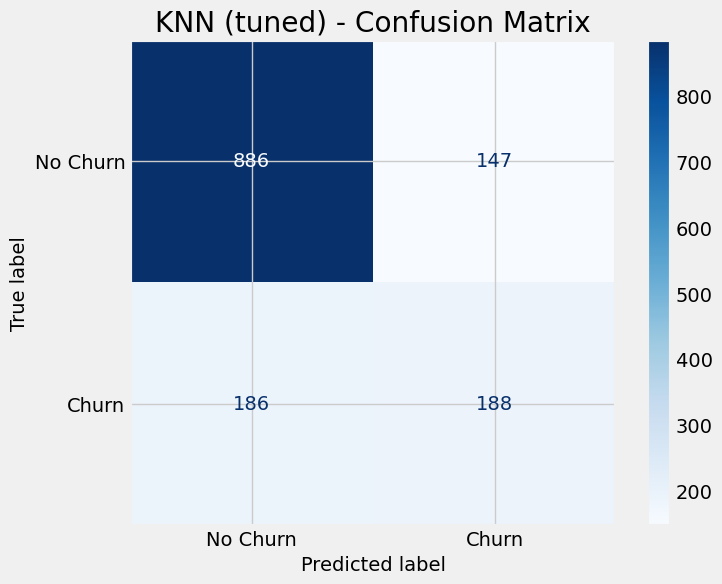

/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


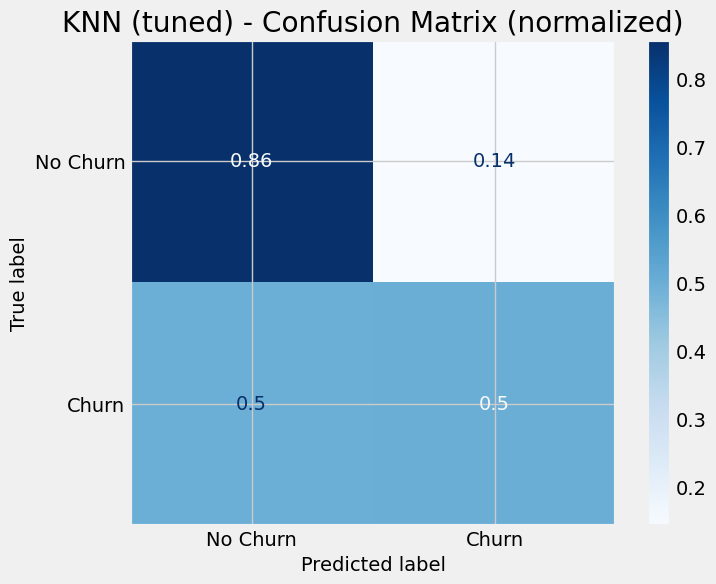

Accuracy Score Test: 0.7633262260127932


/Users/truptikirve/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score Train: 0.8060444444444445 (as comparison)



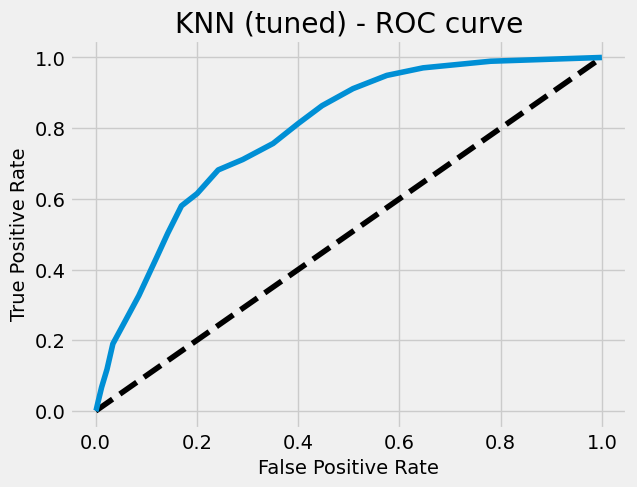

AUC score (ROC): 0.7910167675272168



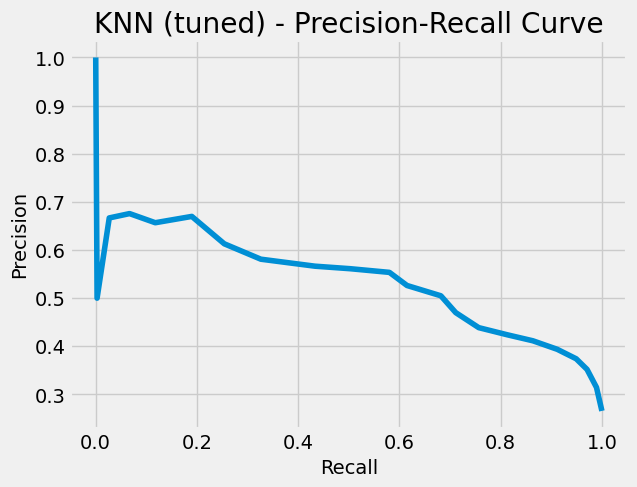

F1 score: 0.530324400564175 
 AUC score (PR): 0.5372378582613967



In [64]:
# plot model evaluyation
confusion_matrix_plot(X_train,y_train,X_test,y_test,knn_cv, y_pred_knn_tuned,"KNN (tuned)")
roc_curve_auc_score(X_test,y_test,y_pred_knn_prob_tuned,'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned,y_pred_knn_prob_tuned, 'KNN (tuned)')

## Logistic Regression tuned


<Axes: >

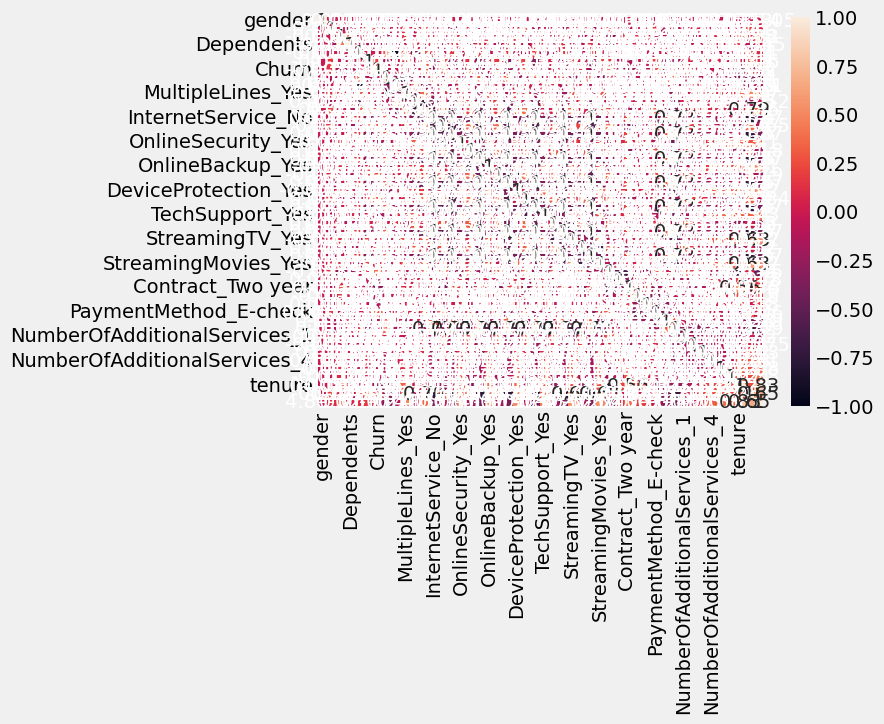

In [66]:
#pairplot
sns.pairplot(df)

# correlaion
sns.heatmap(df.corr(), annot=True)

In [67]:
from sklearn.linear_model import LinearRegression
 

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [69]:
print(lm.intercept_)

34515003657224.49


In [74]:
cdf = pd.DataFrame(lm.coef_,X1.columns, columns=['Coeff'])

In [75]:
cdf

,Coeff
gender,-3.349871e-03
SeniorCitizen,1.069512e-01
Partner,3.460843e-02
Dependents,5.172311e-02
PhoneService,-1.235901e+12
PaperlessBilling,9.872738e-02
MultipleLines_No,-1.230315e+13
MultipleLines_No phone service,-1.353905e+13
MultipleLines_Yes,-1.230315e+13
InternetService_DSL,1.863657e+12


In [ ]:
# predictions = lm.predict(X_test)
# plt.scatter(y_test, predictions)
# plt.xlabel('Y Test (True Values)')
# plt.ylabel('Predicted Y')

In [76]:
from sklearn import metrics


In [ ]:
# print('MAE', metrics.mean_absolute_error(y_test, predictions))
# print('MSE', metrics.mean_squared_error(y_test, predictions))
# print('RMSE',  np.sqrt(metrics.mean_squared_error(y_test, predictions))
# metrics.explained_variance_score(y_test, predictions)

# sns.distplot(y_test-predictions, bins=50) -- plot of residuals